# Resumo

Dados obtidos através do site TABNET, no qual proporciona gastos hospitalares do SUS.<br> 
O objetivo é observar e levantar hipoteses sobre as informações aqui vistas.

## leitura dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Poderiamos utilizar o parametro: na_values='-' na leitura, para declararmos os valores de "-" como NaN
dados = pd.read_csv('../../Dados/UF_AnoMesAtend_ValorTotal.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=12, thousands=".", decimal=",")
dados.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Vamos separar as colunas que são disponiveis para uso, ou seja, as que não possuem o valor nulo(NaN)

In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [4]:
# Aproveitando para definir o nivel de escala por maior gasto.
dados_usaveis = dados[colunas_usaveis].sort_values('Total', ascending = False)
dados_usaveis.drop('Total', 1, inplace = True)

In [5]:
dados_usaveis.set_index('Unidade da Federação', inplace = True)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.691390e+07,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,8.224773e+07,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07


## Desafio I: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

In [6]:
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('Accent')

In [7]:
# para realizar a formatacao dos dados, e nao mostrar a anotacao cientifica, iremos importar o ticker
import matplotlib.ticker as ticker

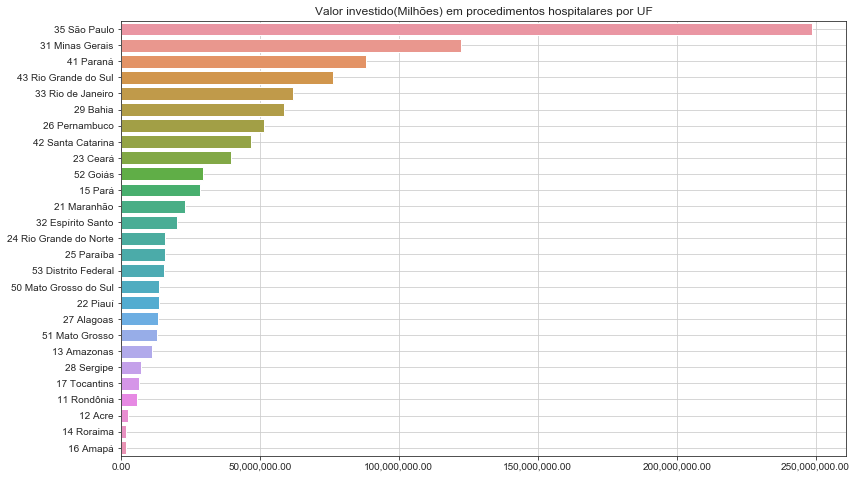

In [8]:
ax, fig = plt.subplots(figsize=(13,8))
ax = sns.barplot(data = dados_usaveis.T, ci=0, orient = 'h')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Valor investido(Milhões) em procedimentos hospitalares por UF')
ax.set_ylabel('')
plt.grid()

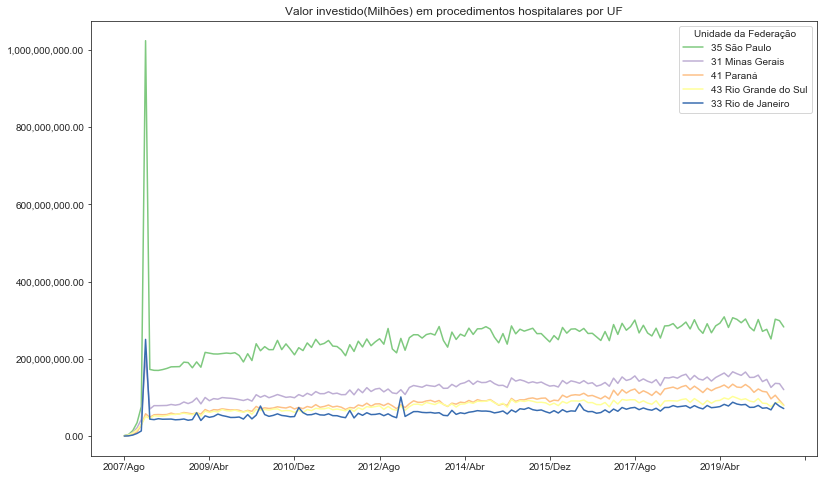

In [9]:
ax = dados_usaveis.head().T.plot(figsize=(13,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Valor investido(Milhões) em procedimentos hospitalares por UF')
ax.set_ylabel('');

Como podemos ver logo de cara, São Paulo foi o estado que mais investiu em saúde, mas por que?<br>
Os dados estão definidos por mês de atendimento, porém o processamento deles é realizado em datas distintas.<br>
(Por exemplo, os dados dos meses anteriores, podem ter sido inseridos depois da data real)<br>
Em janeiro de 2008 houve uma insersão muito grande de dados em São Paulo, então iremos considerar apenas valores a partir de fevereiro de 2008

In [10]:
dados_2008 = dados_usaveis.columns[6:]

In [11]:
dados_atualizados = dados_usaveis[dados_2008]
dados_atualizados.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,...,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,...,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,...,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43 Rio Grande do Sul,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,5.375967e+07,5.639165e+07,5.623376e+07,5.791017e+07,5.959212e+07,5.756574e+07,...,9.691390e+07,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07
33 Rio de Janeiro,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,4.410293e+07,4.434852e+07,4.248794e+07,4.306646e+07,4.455331e+07,4.135151e+07,...,8.224773e+07,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07


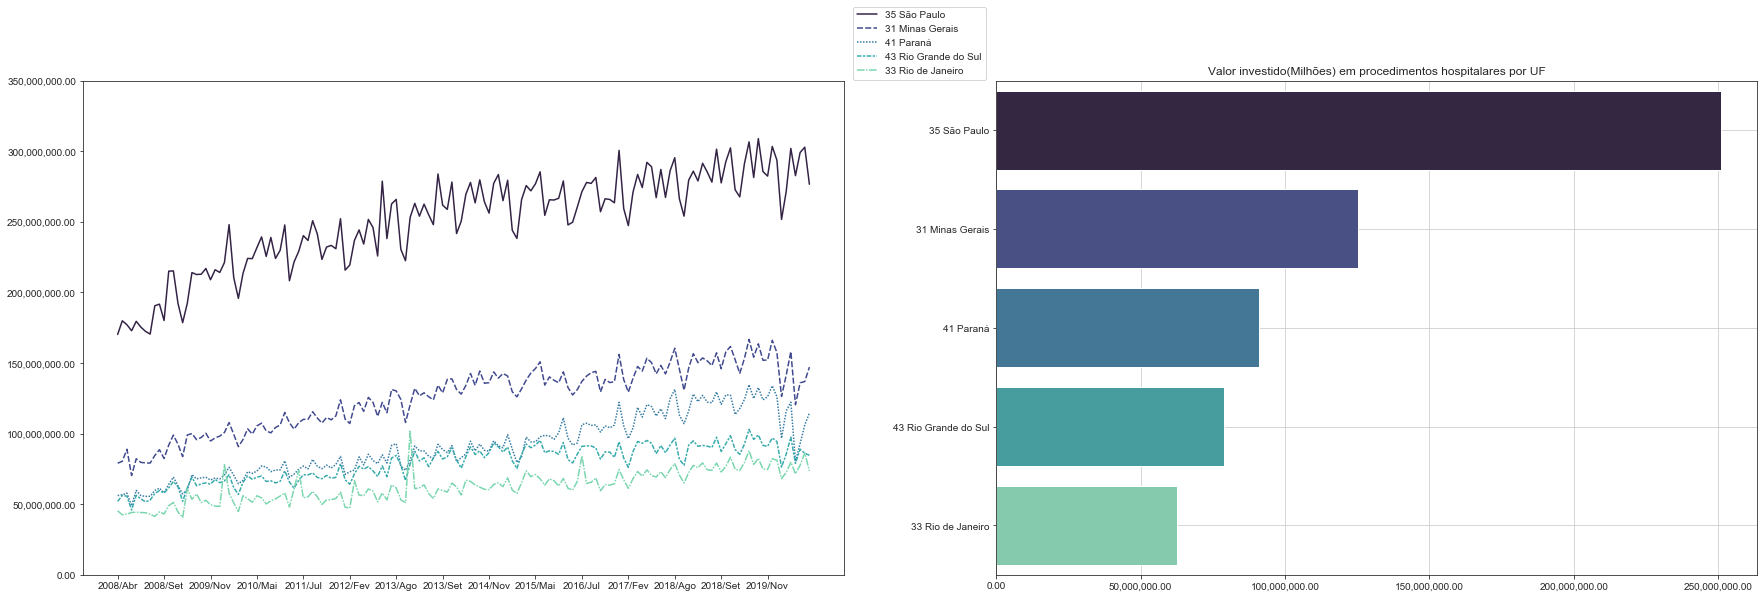

In [66]:
plt.figure(1, figsize=(30,20))
ax = plt.subplot(222)
ax = sns.barplot(data = dados_atualizados.head().T, ci=0, orient = 'h', palette='mako')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Valor investido(Milhões) em procedimentos hospitalares por UF')
ax.set_ylabel('')
plt.grid()

ax = plt.subplot(221)
ax = sns.lineplot(data= dados_atualizados.head().T, palette = 'mako', ci=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xticks(np.arange(0, 150, 10))
plt.ylim(0, 350000000)
ax.legend(loc='best', bbox_to_anchor=(1.193, 1.160));

Agora sim podemos verificar mais confortavelmente a comparação entre os estados.<br>
Apesar de São Paulo ser o estado com maior investimento, podemos observar que os valores são de certa forma estaveis.<br>
Abaixo iremos ver a diferença de investimento com base em seus 7 ultimos meses.

In [13]:
ultimos_meses = dados_atualizados.columns[-7:]
agrupamento = dados_atualizados[ultimos_meses]
agrupamento.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,
35 São Paulo,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43 Rio Grande do Sul,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07
33 Rio de Janeiro,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07


In [14]:
diferenca = agrupamento / agrupamento.loc['35 São Paulo'] * 100
diferenca.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,
35 São Paulo,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
31 Minas Gerais,52.351830,52.080207,53.172528,50.191687,45.191948,45.468195,42.611641
41 Paraná,40.487527,42.770850,41.386260,38.430079,35.034193,31.064401,28.411084
43 Rio Grande do Sul,32.277223,31.490514,30.603569,30.312157,28.421310,29.766343,27.919007
33 Rio de Janeiro,26.393376,26.685462,26.606227,27.080556,28.488972,25.949543,25.305202


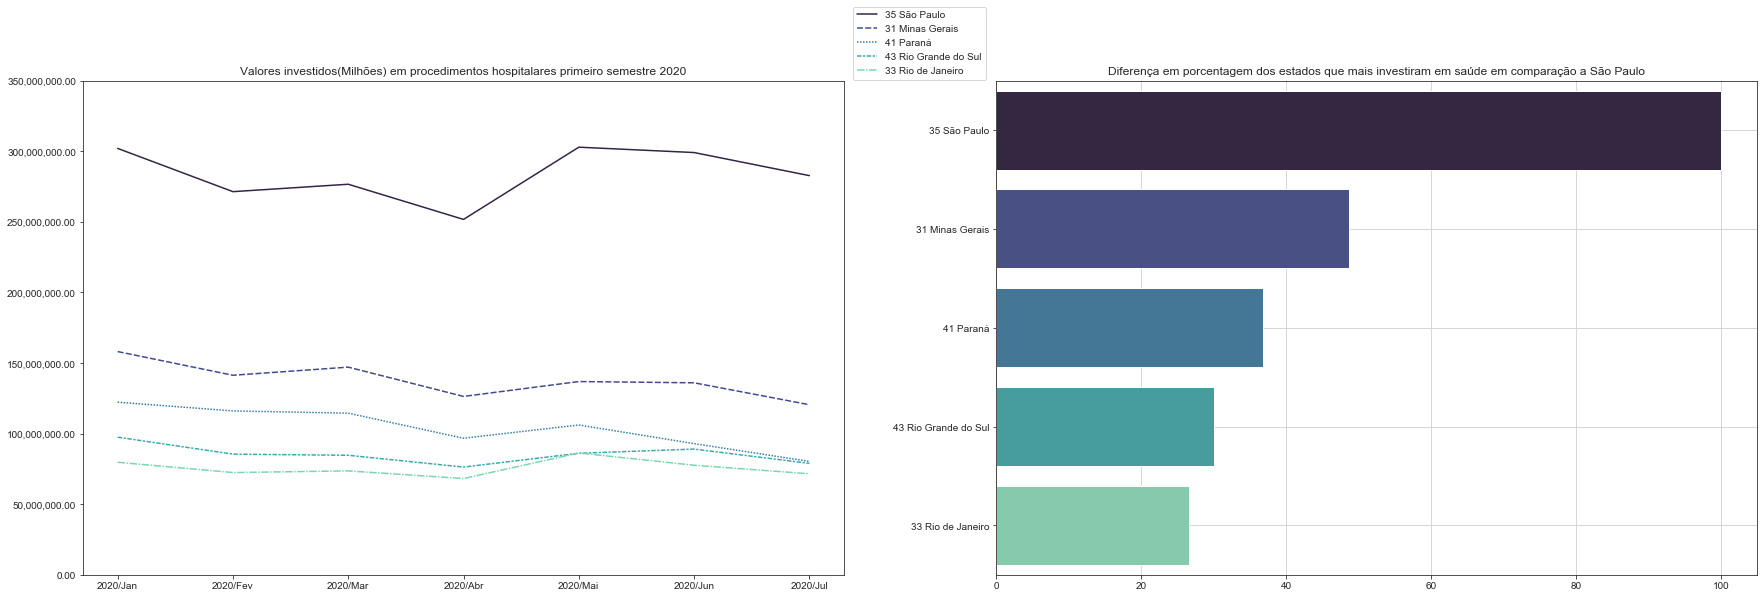

In [18]:
plt.figure(1, figsize=(30,20))

ax = plt.subplot(221)
ax = sns.lineplot(data = agrupamento.head().T, ci=0, sort = False, palette = 'mako')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Valores investidos(Milhões) em procedimentos hospitalares primeiro semestre 2020')
plt.ylim(0, 350000000)
ax.legend(loc='best', bbox_to_anchor=(1.193, 1.160))

ax = plt.subplot(222)
ax = sns.barplot(data = diferenca.head().T, orient = 'h', ci = 0, palette = 'mako')
ax.set_ylabel('')
ax.set_title('Diferença em porcentagem dos estados que mais investiram em saúde em comparação a São Paulo')
plt.grid();

Como todos ja sabemos, estamos em tempos de pandemia, então irei focar no primeiro semestre de 2020 (até julho, para que possamos verificar a tendencia da linha de investimento em procedimentos hospitalares).<br>

Com base no gráfico a esquerda, podemos verificar que de janeiro até abril, houve uma queda no investimento em procedimentos hospitalares, porém, em maio, basicamente todos os estados escolhidos demonstram uma elevação em seus investimentos.<br>

Artigo BBC: https://www.bbc.com/portuguese/brasil-52988646 <br>
Segundo o artigo acima, que foi postado no dia 10 junho 2020, o Brasil ainda não chegou ao seu pico total de infectados com Covid, porém os numeros estão crescendo, isso pode indicar o motivo da elevação que houve no mês de maio.<br>

Abaixo iremos comparar os investimentos hospitalares com os óbitos do inicio de 2020

### leitura do novo dataset

In [19]:
dados2 = pd.read_csv('../../Dados/UF_AnoMesAtend_Obito.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=12, thousands=".", decimal=",")
dados2.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Abr,2008/Jun,2008/Set,2009/Jan,2009/Fev,2009/Mar,2009/Jun,2009/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,59,157,313,256,268,268,341,289,175,2146
1,12 Acre,-,-,-,-,-,-,-,-,-,...,60,101,144,156,124,151,168,140,64,1168
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,184,393,602,534,606,1518,1289,654,265,6077
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,13,34,126,92,112,87,237,290,105,1098
4,15 Pará,-,-,-,-,-,-,-,-,-,...,208,585,944,920,1041,1238,2031,1115,516,8660


In [24]:
col_usaveis = dados2.mean().index.tolist()
col_usaveis.insert(0, 'Unidade da Federação')

In [27]:
dados2_usaveis = dados2[col_usaveis].sort_values('Total', ascending = False)
dados2_usaveis.set_index('Unidade da Federação', inplace = True)

In [38]:
interesse = dados2_usaveis.columns[3:]
prim_sem = dados2_usaveis[interesse]

In [39]:
prim_sem.drop('Total', 1, inplace = True)

C:\Users\Kaiqu\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
prim_sem.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,
35 São Paulo,10681,9679,10868,11596,13225,11971,7493
31 Minas Gerais,4929,4430,4726,4124,4345,3991,2559
33 Rio de Janeiro,4156,3656,3891,5144,5789,3754,2195
43 Rio Grande do Sul,3170,2897,2893,2760,3057,2894,1685
41 Paraná,2815,2655,2797,2551,2291,2067,1187


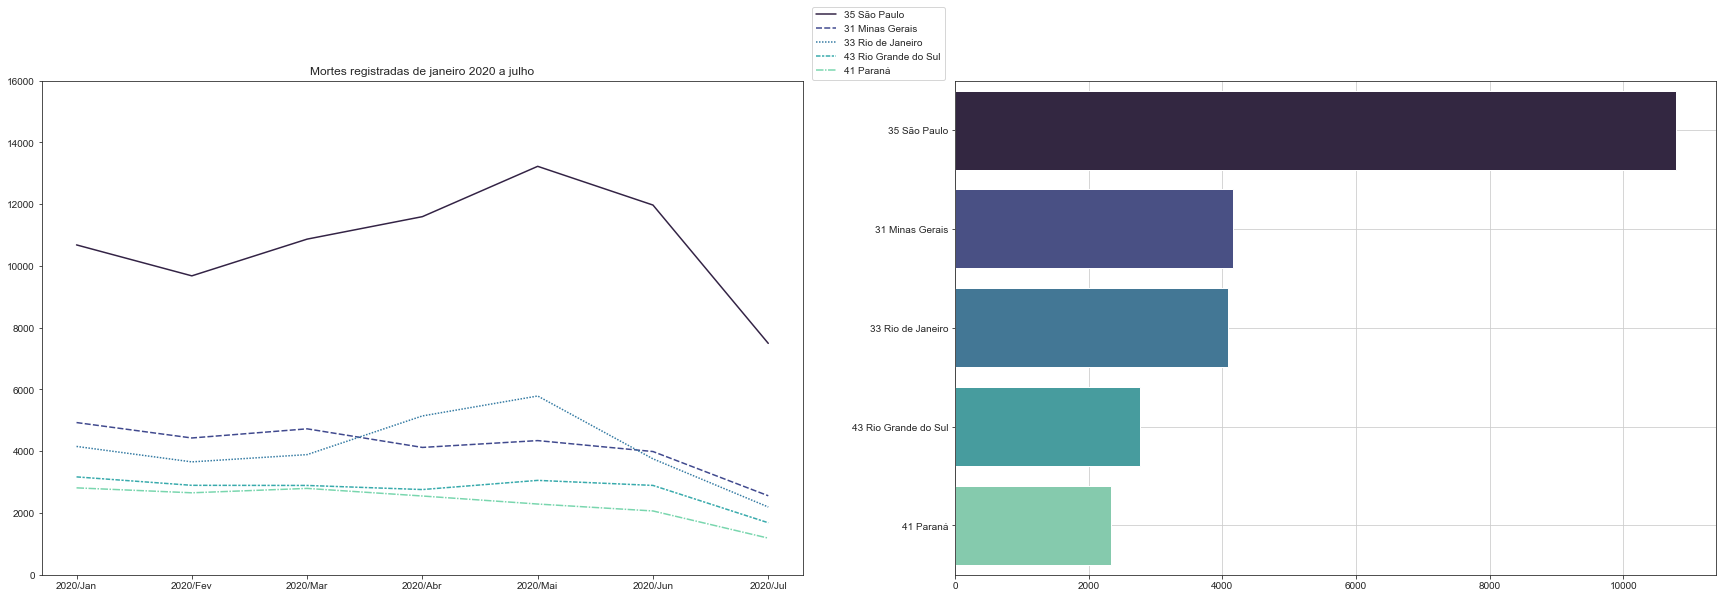

In [68]:
plt.figure(1, figsize = (30,20))
ax = plt.subplot(221)
ax = sns.lineplot(data = prim_sem.head().T, sort = False, palette = 'mako')
plt.ylim(0, 16000);
ax.legend(loc='best', bbox_to_anchor=(1.193, 1.160))
ax.set_title('Mortes registradas de janeiro 2020 a julho')

ax = plt.subplot(222)
ax = sns.barplot(data = prim_sem.head().T, palette = 'mako', orient = 'h', ci = 0)
ax.set_ylabel('')
plt.grid()

Com base nos gráficos acima, podemos verificar que os óbitos se comportam de forma semelhante aos dados de investimento em saúde, abaixo uma comparação do gráfico de investimentos e o de óbitos.<br>
Vale ressaltar também a semelhança entre os gráficos de barras sobre os estados com maiores niveis de investimento e os de óbitos.

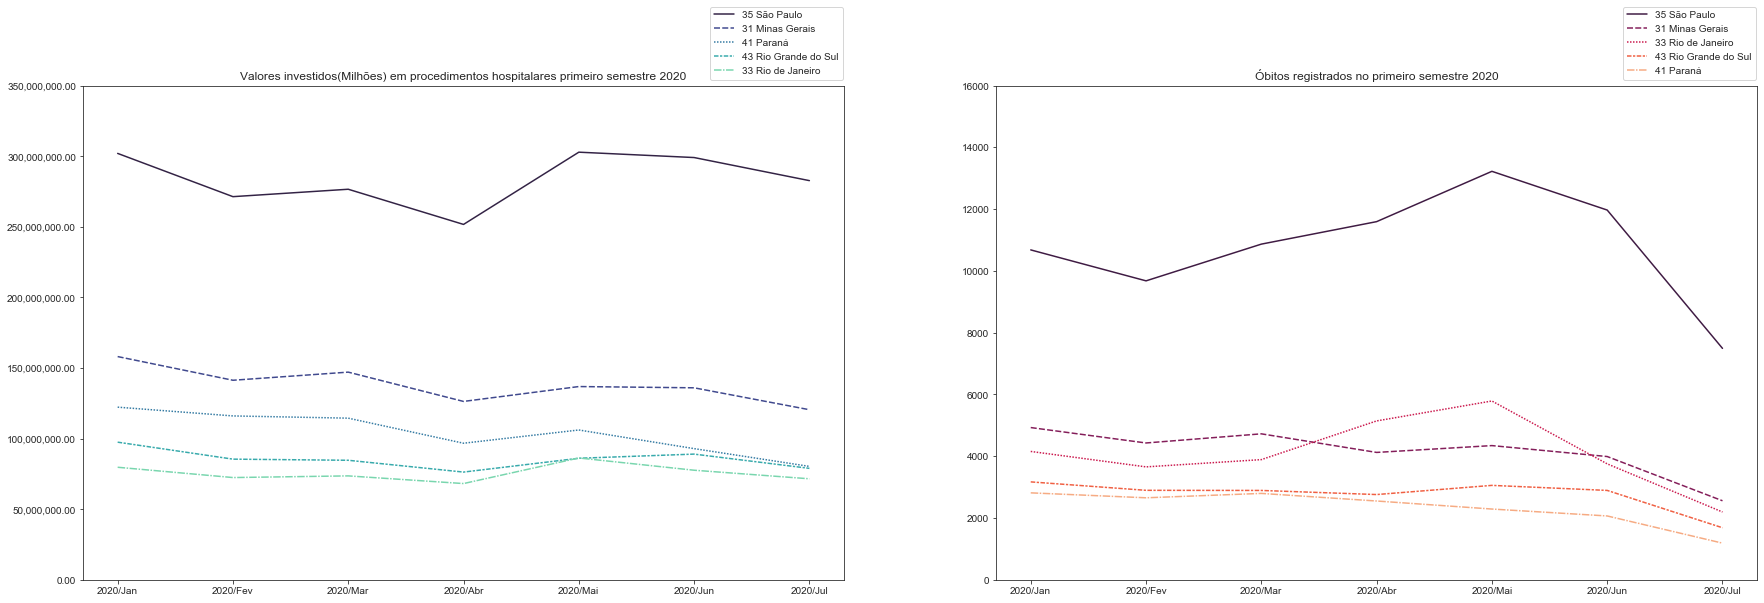

In [94]:
plt.figure(1, figsize = (30,20))

ax = plt.subplot(221)
ax = sns.lineplot(data = agrupamento.head().T, ci=0, sort = False, palette = 'mako')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Valores investidos(Milhões) em procedimentos hospitalares primeiro semestre 2020')
plt.ylim(0, 350000000)
ax.legend(loc='best', bbox_to_anchor=(1.005, 1.170))

ax = plt.subplot(222)
ax = sns.lineplot(data = prim_sem.head().T, sort = False, palette = 'rocket')
plt.ylim(0, 16000);
ax.legend(loc='best', bbox_to_anchor=(1.005, 1.170))
ax.set_title('Óbitos registrados no primeiro semestre 2020');